In [1]:
import warnings
def dummy(*args, **kwargs):
    pass

warnings.warn = dummy

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import (
    f_classif,
    mutual_info_classif,
)
from sklearn.model_selection import train_test_split
from utils import (
    Preprocessing,
    get_data,
    create_ssl_dataset
)
import config

In [3]:
FEATURE_NAMES = [
    'fLength',
    'fWidth',
    'fSize',
    'fConc',
    'fConc1',
    'fAsym',
    'fM3Long',
    'fM3Trans',
    'fAlpha',
    'fDist',
    'class',
]

# Supervised Learning

In [5]:
data_og = pd.read_csv(os.path.join(config.DATASET_ROOT, 'magic04.data'),
                      names=FEATURE_NAMES)
data_og.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
# Copy data to a different variable to perform preprocessing
data = data_og.copy()

In [7]:
data = Preprocessing.encode_labels(data, 'class')
data.drop('class', axis=1, inplace=True)
X, y = data.drop('class_encoded', axis=1), data['class_encoded']
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class_encoded
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


In [8]:
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    random_state=config.RANDOM_STATE)

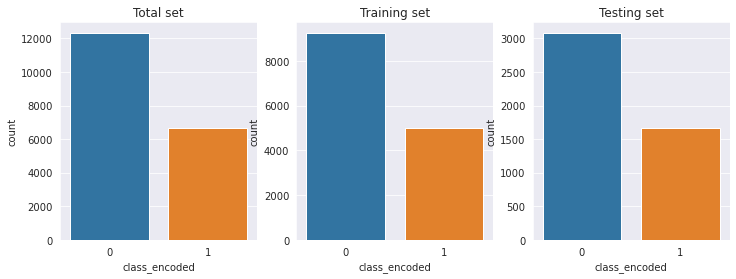

In [9]:
# Distribution plot of training and testing labels
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 4)

sns.countplot(data.class_encoded, ax=ax[0])
ax[0].set_title("Total set")

sns.countplot(y_train, ax=ax[1])
ax[1].set_title("Training set")

sns.countplot(y_test, ax=ax[2])
ax[2].set_title("Testing set")

plt.savefig(f"{config.PLOTS_DIR}/eda/label_distribution.png")

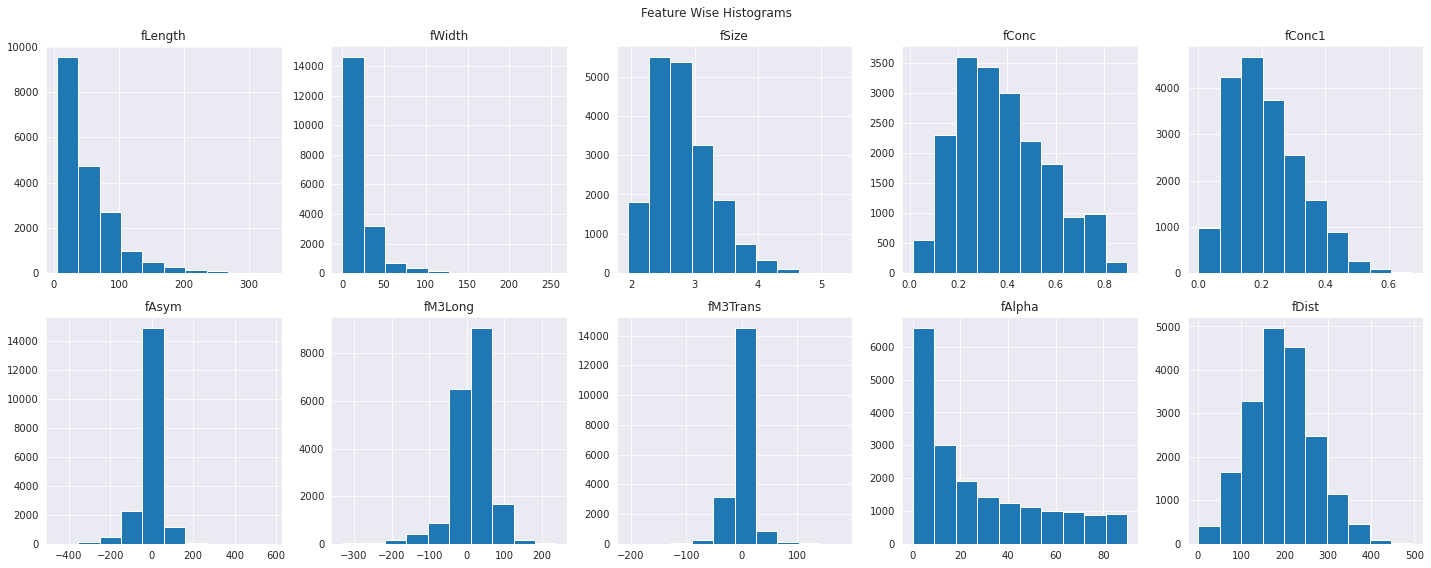

In [10]:
def plot_data(dataframe: pd.DataFrame):
    # fig, ax = plt.subplots(dataframe.shape[1] // 2, 2)
    # fig.set_size_inches(8, 20)
    fig, ax = plt.subplots(2, dataframe.shape[1] // 2)
    fig.set_size_inches(20, 8)
    for i, col in enumerate(dataframe.select_dtypes('number').columns):
        fig.axes[i].hist(dataframe[col])
        fig.axes[i].set_title(f'{col}')
    fig.suptitle('Feature Wise Histograms')
    plt.tight_layout()
    plt.savefig(f'{config.PLOTS_DIR}/eda/feature_plot.png', dpi=100)
    plt.show()

plot_data(data.drop('class_encoded', axis=1))

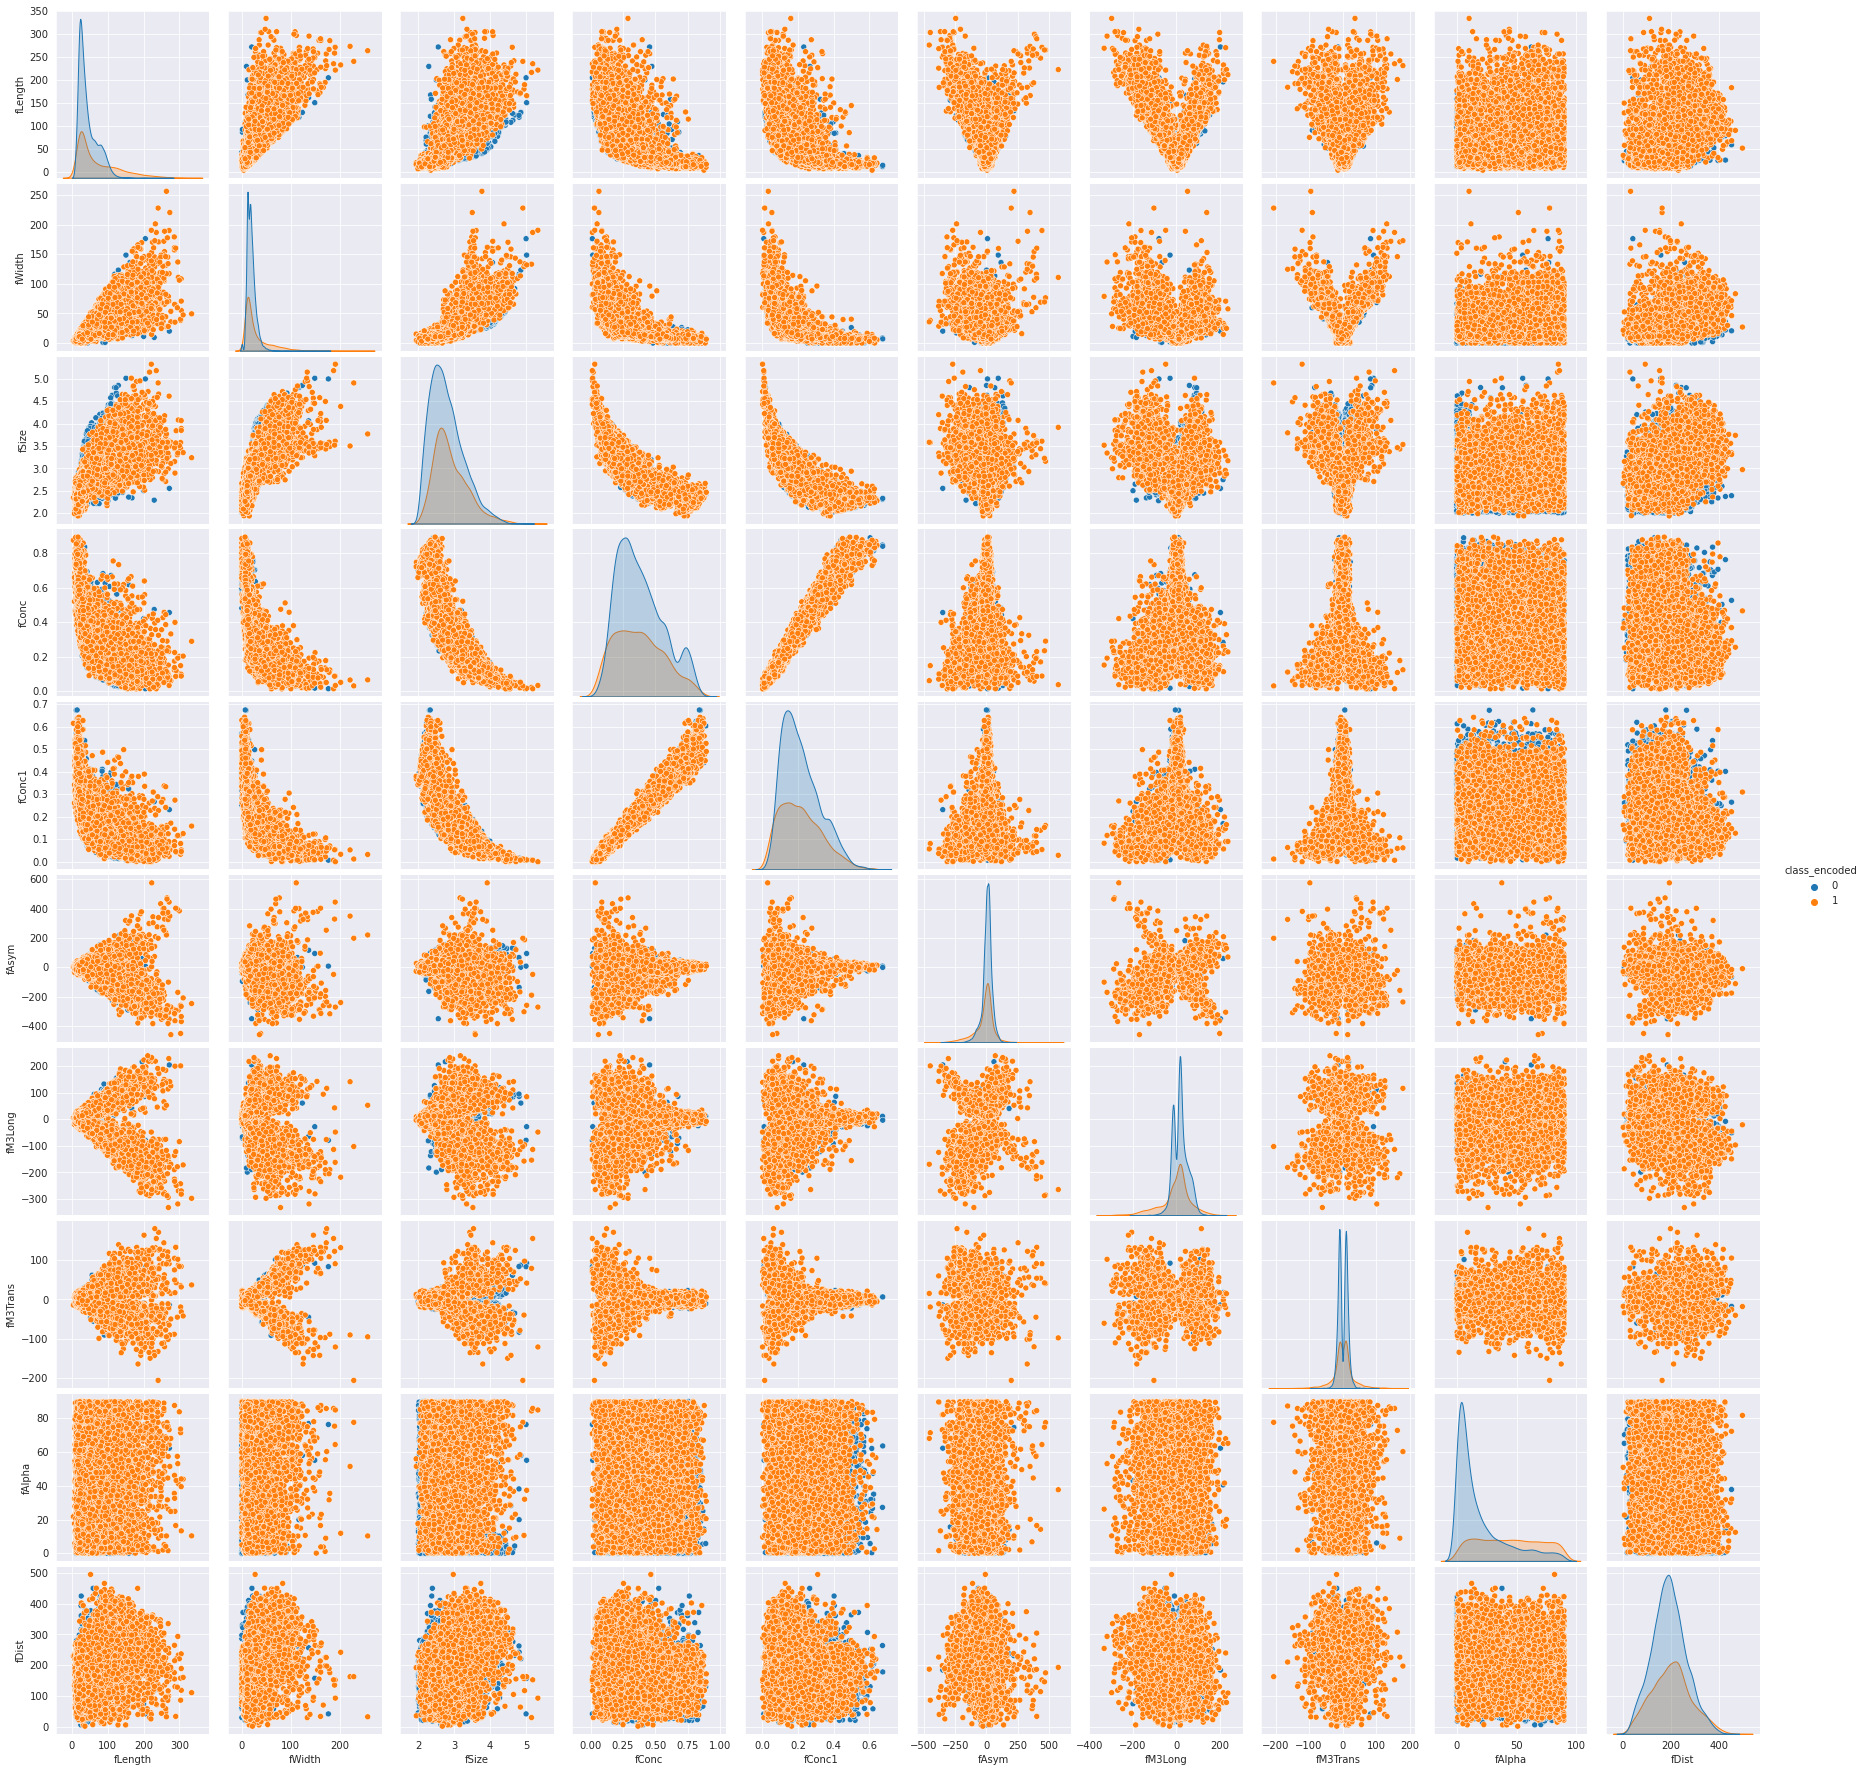

In [56]:
fig = sns.pairplot(data, hue='class_encoded')
# fig.suptitle('Pairwise Relationships of Features')
fig.savefig(f'{config.PLOTS_DIR}/eda/pairplot.png')

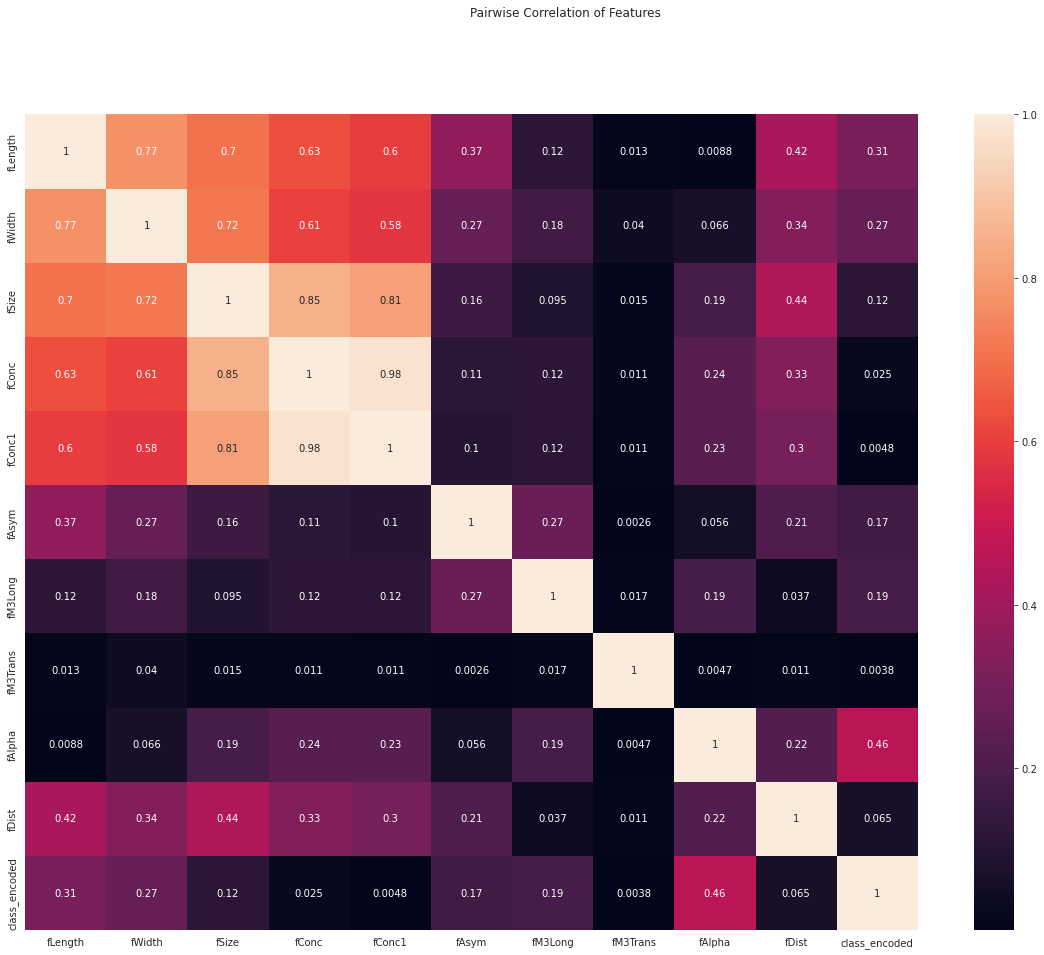

In [53]:
fig = plt.figure(figsize=(20, 15))
sns.heatmap(data.corr().abs(), annot=True)
fig.suptitle('Pairwise Correlation of Features')
fig.savefig(f'{config.PLOTS_DIR}/eda/corr_plot.png')

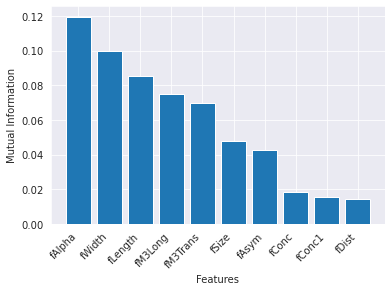

In [51]:
figure = plt.figure()
m_score = mutual_info_classif(X_train,
                              y_train,
                              random_state=config.RANDOM_STATE)
plt.bar(
    X_train.columns[np.argsort(m_score)][::-1],
    np.sort(m_score)[::-1]
)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mutual Information')
plt.xlabel('Features')
plt.savefig(f'{config.PLOTS_DIR}/eda/m_score.png')
plt.show()

# Semi-Supervised Learning

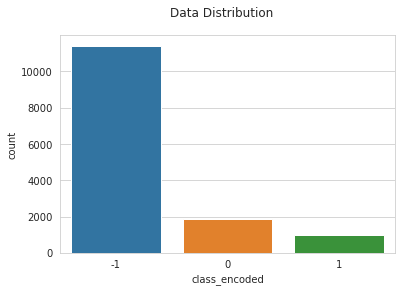

In [7]:
X_train, X_test, y_train, y_test = get_data(
    os.path.join(config.DATASET_ROOT,
                 'magic04.data'),
    columns=config.FEATURE_NAMES
)

X, y, X_trs, y_trs = create_ssl_dataset(X_train, y_train)

fig, ax = plt.subplots(1, 1)
sns.countplot(y, ax=ax)
fig.suptitle('Data Distribution')
fig.savefig(f'{config.PLOTS_DIR}/eda/ssl_dist.png')